## Czyszczenie danych

#### Interesują nas tylko wyścigi od 1991 do 2022 roku (ze względu na zaszumienia np. wyścigi powyżej 200 okrążeń, sezon 2023 nie został w całości uwzględniony w tabeli results i by uwzględnić całą karierę Michaela Schumachera)

![query1](query1.png)

![query2](query2.png)

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
db_name = 'f1.db'
connection = sqlite3.connect(db_name)

# Query the data from the table
query = "SELECT ra.name, ra.year, d.forename || ' ' || d.surname AS driver_name, c.name, re.positionOrder, re.laps, s.status FROM results re INNER JOIN races ra ON ra.raceId = re.raceId INNER JOIN drivers d ON d.driverId = re.driverId INNER JOIN constructors c ON c.constructorId = re.constructorId INNER JOIN status s ON s.statusId = re.statusId"
result = connection.execute(query).fetchall()

# Get column names from the cursor description
columns = ["race_name", "race_year", "driver_name", "constructor_name", "driver_final_position", "laps_driven", "ending"]

# Create a DataFrame
df = pd.DataFrame(result, columns=columns)

# Close the connection
connection.close()

# Print the DataFrame
print(df)

                   race_name  race_year        driver_name constructor_name  \
0      Australian Grand Prix       2008     Lewis Hamilton          McLaren   
1      Australian Grand Prix       2008      Nick Heidfeld       BMW Sauber   
2      Australian Grand Prix       2008       Nico Rosberg         Williams   
3      Australian Grand Prix       2008    Fernando Alonso          Renault   
4      Australian Grand Prix       2008  Heikki Kovalainen          McLaren   
...                      ...        ...                ...              ...   
11434   Abu Dhabi Grand Prix       2022    Mick Schumacher     Haas F1 Team   
11435   Abu Dhabi Grand Prix       2022    Kevin Magnussen     Haas F1 Team   
11436   Abu Dhabi Grand Prix       2022     Lewis Hamilton         Mercedes   
11437   Abu Dhabi Grand Prix       2022    Nicholas Latifi         Williams   
11438   Abu Dhabi Grand Prix       2022    Fernando Alonso   Alpine F1 Team   

       driver_final_position  laps_driven          

## Średnia

In [2]:
def mean(values):
    mean = 0
    for value in values:
        mean += value
    mean /= len(values)
    return mean

## Mediana

In [3]:
def median(values):
    n = len(values)
    if n % 2 == 1:
        return values[n // 2 + 1]
    else:
        return (values[n // 2] + values[n // 2 + 1]) / 2

## Rozstęp

In [4]:
def sample_range(values):
    n = len(values)
    return values.iloc[n-1] - values.iloc[0]

## Wariancja

In [5]:
def variance(values):
    n = len(values)
    m = mean(values)
    variance = 0
    for value in values:
        variance += (value - m) ** 2
    variance /= (n - 1)
    return variance

## Średnie odchylenie

In [6]:
def average_deviation(values):
    n = len(values)
    deviation = 0
    m = mean(values)
    for value in values:
        deviation += abs(value - m)
    return deviation / n

## Dolny kwartyl

In [7]:
def left_hinge(values):
    med = median(values)
    lower_values = []
    for value in values:
        if value <= med:
            lower_values.append(value)
    return median(lower_values)

## Górny kwartyl

In [8]:
def right_hinge(values):
    med = median(values)
    upper_values = []
    for value in values:
        if value > med:
            upper_values.append(value)
    return median(upper_values)

In [9]:
def print_info(values):
    print("Mean:\n", round(mean(values), 2))

    print("Median:\n", round(median(values.tolist()), 2))

    print("Sample range:\n", round(sample_range(values), 2))

    print("Variance:\n", round(variance(values), 2))

    print("Standard deviation:\n", round(variance(values) ** 1 / 2, 2))

    print("Average deviation:\n", round(average_deviation(values), 2))

    print("Right hinge:\n", round(right_hinge(values.tolist()),2))

    print("Left hinge:\n", round(left_hinge(values.tolist()),2))

In [10]:
laps = df["laps_driven"].astype(int)
laps.sort_values(ascending=True, inplace=True)
print(laps)

916       0
1308      0
1307      0
5113      0
5112      0
         ..
10527    87
10529    87
10530    87
10523    87
10526    87
Name: laps_driven, Length: 11439, dtype: int32


In [11]:
print_info(laps)

Mean:
 50.32
Median:
 56
Sample range:
 87
Variance:
 434.14
Standard deviation:
 217.07
Average deviation:
 15.92
Right hinge:
 67
Left hinge:
 45.0


## Histogram

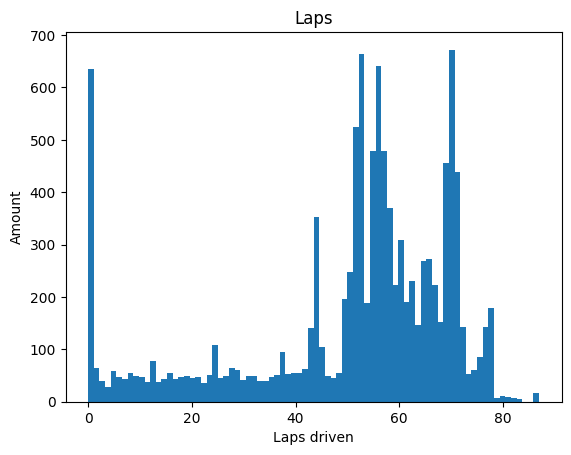

In [12]:
plt.hist(laps, bins=80)
plt.title("Laps")
plt.xlabel("Laps driven")
plt.ylabel("Amount")
plt.show()

## Boxplot

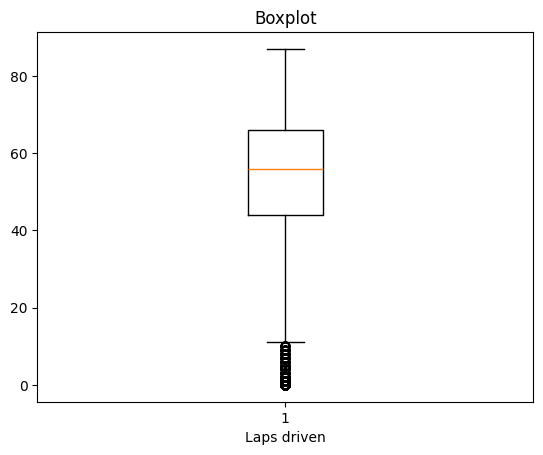

In [13]:
plt.boxplot(laps)
plt.title("Boxplot")
plt.xlabel("Laps driven")
plt.show()

## Violinplot

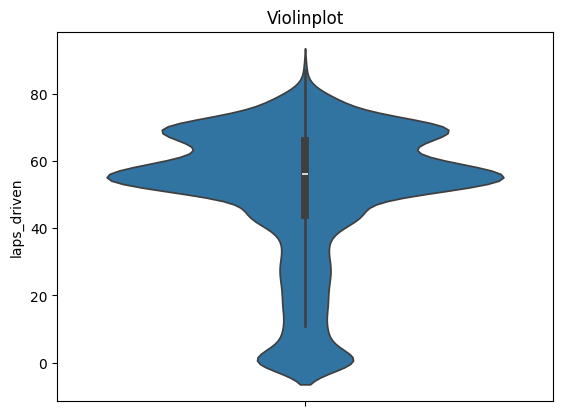

In [14]:
sns.violinplot(laps)
plt.title("Violinplot")
plt.show()

In [15]:
drivers = df["driver_name"]
print(drivers)

0           Lewis Hamilton
1            Nick Heidfeld
2             Nico Rosberg
3          Fernando Alonso
4        Heikki Kovalainen
               ...        
11434      Mick Schumacher
11435      Kevin Magnussen
11436       Lewis Hamilton
11437      Nicholas Latifi
11438      Fernando Alonso
Name: driver_name, Length: 11439, dtype: object


## Kierowcy z największa ilością wyścigów

driver_name
Fernando Alonso         358
Kimi RĂ¤ikkĂ¶nen        352
Lewis Hamilton          310
Rubens Barrichello      310
Jenson Button           309
Sebastian Vettel        300
Felipe Massa            271
Michael Schumacher      270
Jarno Trulli            256
David Coulthard         247
Sergio PĂ©rez           237
Daniel Ricciardo        232
Giancarlo Fisichella    231
Mark Webber             217
Nico Rosberg            206
Name: count, dtype: int64


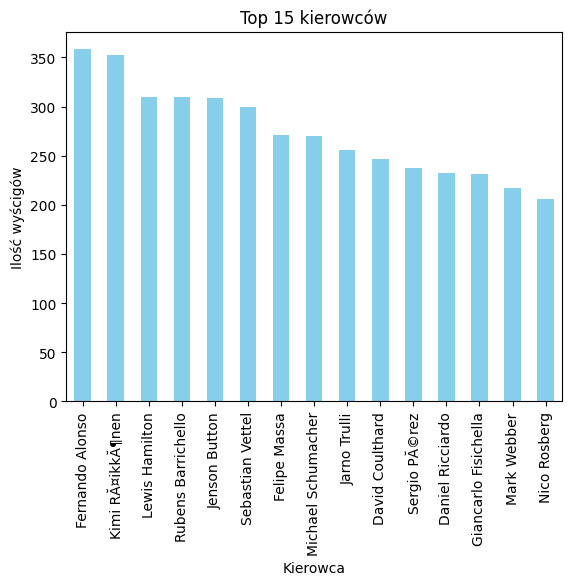

In [16]:
top_drivers = drivers.value_counts()[:15]
print(top_drivers)
top_drivers.plot(kind='bar', color='skyblue')
plt.title('Top 15 kierowców')
plt.xlabel('Kierowca')
plt.ylabel('Ilość wyścigów')
plt.show()

## Najpopularniejsze przyczyny nieukończenia wyścigu (DNF)

ending
Collision        552
Engine           504
Spun off         358
Gearbox          291
Accident         264
                ... 
Chassis            1
Stalled            1
Tyre puncture      1
Engine fire        1
Underweight        1
Name: count, Length: 91, dtype: int64


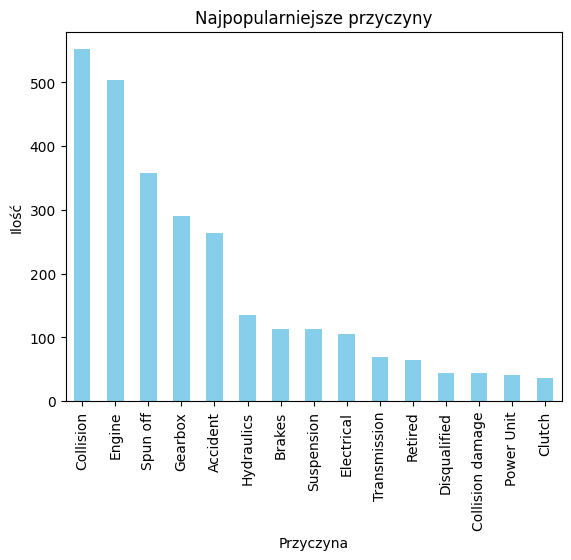

In [66]:
dnfs = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished|Did not qualify)\b', case=False, regex=True)]["ending"].value_counts()
print(dnfs)
dnfs[:15].plot(kind='bar', color='skyblue')
plt.title("Najpopularniejsze przyczyny")
plt.xlabel("Przyczyna")
plt.ylabel("Ilość")
plt.show()

# Analiza przyczyń nieukończenia wyścigu

    race_year  count
0        1994    249
1        1995    211
2        1996    178
3        1999    172
4        1997    170
5        2002    161
6        2001    157
7        2000    154
8        1998    153
9        2006    128
10       2010    118
11       2003    111
12       2007    103
13       2004    102
14       2005    100
15       2017     95
16       2012     91
17       2008     87
18       2014     86
19       2018     85
20       2016     84
21       2011     82
22       2015     81
23       2022     74
24       2009     70
25       2013     64
26       2019     60
27       2021     59
28       2020     57


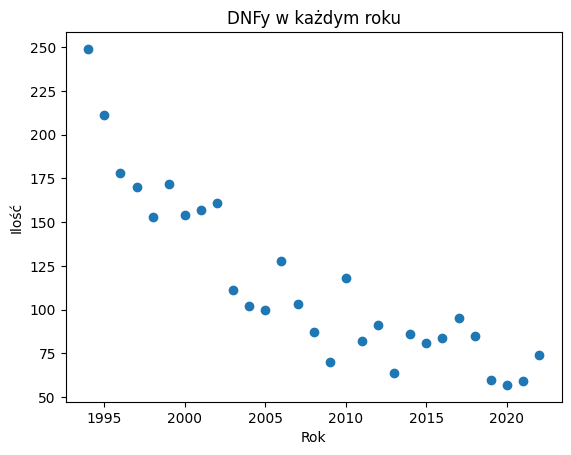

In [56]:
dnfs2 = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished)\b', case=False, regex=True)]['race_year']
grouped_dnfs = dnfs2.value_counts().reset_index(name='count')
print(grouped_dnfs)

plt.scatter(grouped_dnfs['race_year'], grouped_dnfs['count'])
plt.xlabel('Rok')
plt.ylabel('Ilość')
plt.title('DNFy w każdym roku')
plt.show()

### Regresja liniowa

In [51]:
def linear_regression(x_values, y_values):
    B = [x for x in range(5000, 15000, 600)]
    best_model_b = B[0]
    best_model_a = 0
    best_error = float("inf")
    learning_rate = 1e-7
    epochs = 100

    n = x_values.size
    for b in B:
        a = best_model_a
        for _ in range(epochs):
            dl_da = 0
            dl_db = 0
            for i in range(n):
                dl_da += (a * x_values[i] + b - y_values[i]) * x_values[i]
                dl_db += (a * x_values[i] + b - y_values[i])
            # gradient descent
            a -= 2/n * dl_da * learning_rate
            b -= 2/n * dl_db * learning_rate

        error = 0
        for i in range(x_values.size):
            error += (a * x_values[i] + b - y_values[i]) ** 2
        if error < best_error:
            best_error = error
            best_model_b = b
            best_model_a = a
    print(best_model_a, best_model_b, best_error)

    plt.scatter(x_values, y_values)
    plt.plot(list(range(1993, 2022)), [best_model_a * x + best_model_b for x in range(1993, 2022)], color="red")
    plt.show()

-5.121891597085801 10399.999851195094 14361.207011753331


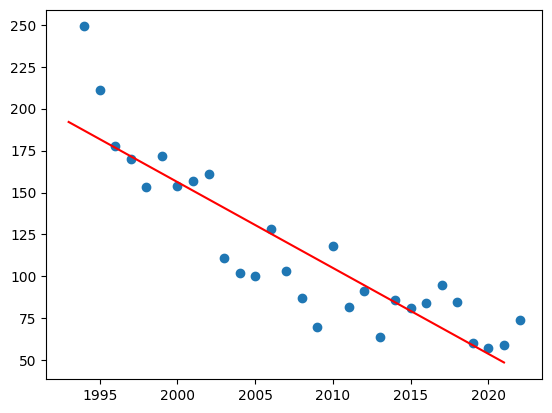

In [52]:
linear_regression(grouped_dnfs['race_year'], grouped_dnfs['count'])

                  count
constructor_name       
McLaren             278
Williams            277
Sauber              251
Minardi             198
Ferrari             192
Jordan              182
Toro Rosso          147
Renault             137
Red Bull            132
Arrows              117
BAR                 102
Tyrrell              93
Benetton             92
Force India          88
Toyota               81
Prost                81
Jaguar               78
Haas F1 Team         64
Stewart              63
Footwork             61
Pacific              60
Mercedes             51
Lotus F1             42
Forti                39
Ligier               38
HRT                  36
Super Aguri          32
Lotus                26
Virgin               25
Simtek               25
Honda                25
Caterham             25
BMW Sauber           23
Alfa Romeo           22
AlphaTauri           22
Larrousse            20
Marussia             17
Spyker               16
Aston Martin         14
Team Lotus      

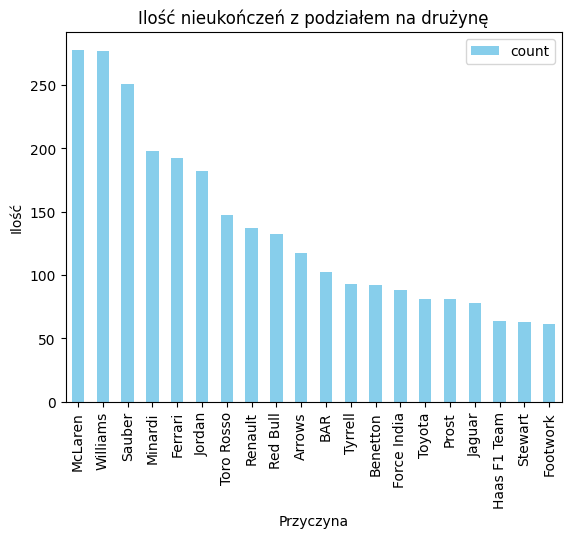

In [93]:
dnfs3 = df[~df["ending"].str.contains(r'\b(?:Lap|Laps|Finished)\b', case=False, regex=True)]['constructor_name']
dnfs3 = dnfs3.value_counts()
dnfs3 = pd.DataFrame(dnfs3)
print(dnfs3)
dnfs3[:20].plot(kind='bar', color='skyblue')
plt.title("Ilość nieukończeń z podziałem na drużynę")
plt.xlabel("Drużyna")
plt.ylabel("Ilość")
plt.show()

## Czy jest to dobra reprezentacja danych?

                  count_ilosc_nieukonczen  count_ilosc_wyscigow  count_ratio
constructor_name                                                            
McLaren                               278                  1062     0.261770
Williams                              277                  1061     0.261074
Sauber                                251                   757     0.331572
Minardi                               198                   402     0.492537
Ferrari                               192                  1062     0.180791
Jordan                                182                   404     0.450495
Toro Rosso                            147                   536     0.274254
Renault                               137                   556     0.246403
Red Bull                              132                   696     0.189655
Arrows                                117                   190     0.615789
BAR                                   102                   236     0.432203

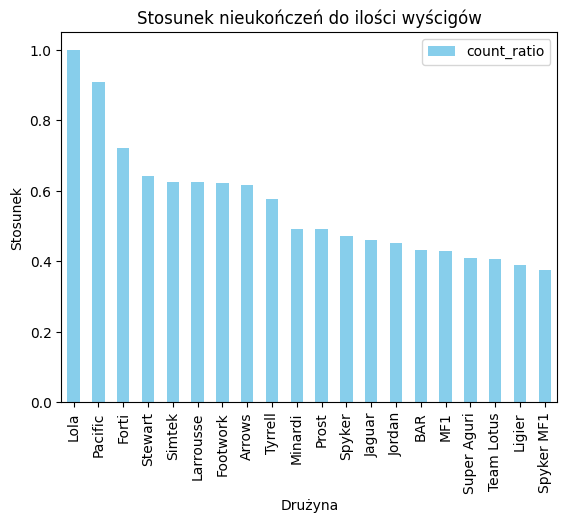

In [101]:
constructors = df['constructor_name'].value_counts()
merged_df = pd.merge(dnfs3, constructors, on='constructor_name', suffixes=('_ilosc_nieukonczen', '_ilosc_wyscigow'))
merged_df['count_ratio'] = merged_df['count_ilosc_nieukonczen'] / merged_df['count_ilosc_wyscigow']
print(merged_df)
operating_df = merged_df['count_ratio']
operating_df = pd.DataFrame(operating_df)
operating_df = operating_df.sort_values(by='count_ratio', ascending=False)
print(operating_df)
operating_df[:20].plot(kind='bar', color='skyblue')
plt.title("Stosunek nieukończeń do ilości wyścigów")
plt.xlabel("Drużyna")
plt.ylabel("Stosunek")
plt.show()